# Initialization


In [22]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

from cb25d.compare_gamma_original import run_gamma_comparison_original
from cb25d.notebook import init, savefig
from cb25d.simulation_impl_original import (
    SimulationImplOriginal,
    generate_initial_conditions,
)

init()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gamma value comparison

## Computation


In [ ]:
att_vals = np.arange(0, 0.6 + (step := 0.05), step)
ali_vals = np.arange(0, 1.2 + (step := 0.1), step)
statistics = run_gamma_comparison_original(
    seed=0,
    att_vals=att_vals,
    ali_vals=ali_vals,
    create_initial_state=lambda att, ali, seed: SimulationImplOriginal(
        c_eta=0.8,
        c_gamma_ali=ali,
        c_gamma_att=att,
        c_gamma_rand=0.2,
        c_k=1,
        c_l_ali=3,
        c_tau_0=0.8,
        **generate_initial_conditions(
            seed=seed,
            n=100,
            l_att=3,
        ),
    ),
    runs_per_config=20,
    steps_per_run=2000 * 100,
)

  0%|          | 0/845 [00:00<?, ?it/s]

In [ ]:
p = Path("results/original/gamma/k=1")
p.mkdir(parents=True, exist_ok=True)
np.save(p / "att.npy", att_vals)
np.save(p / "ali.npy", ali_vals)
np.save(p / "statistics.npy", statistics)

## Plot


In [109]:
p = Path("results/original/gamma/k=1")
att_vals = np.load(p / "att.npy")
ali_vals = np.load(p / "ali.npy")
statistics = np.load(p / "statistics.npy")

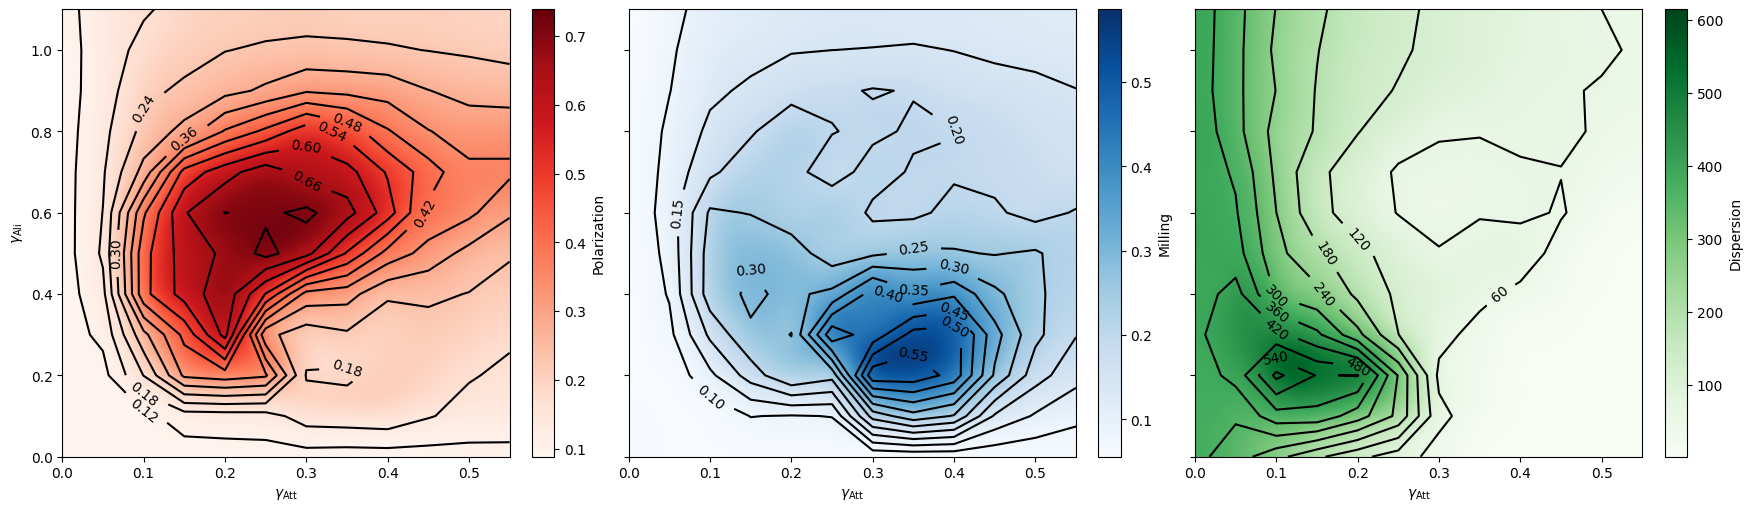

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, sharey=True, figsize=(18, 5), layout="compressed"
)
ax1: Axes
ax2: Axes
ax3: Axes

ax1.set_box_aspect(1)
ax2.set_box_aspect(1)
ax3.set_box_aspect(1)

ax1.set_ylabel(r"$\gamma_\text{Ali}$")


def contour(ax: Axes, stat_i: int, cmap: str, cbar_label: str):
    data = statistics[:, :, stat_i].T
    im = ax.imshow(
        data,
        cmap=cmap,
        aspect="auto",
        interpolation="quadric",
        origin="lower",
        extent=(0, att_vals.max(), 0, ali_vals.max()),
    )
    cbar = fig.colorbar(im, ax=ax)
    cntr = ax.contour(att_vals, ali_vals, data, levels=10, colors="k")
    ax.clabel(cntr, cntr.levels)  # type: ignore
    cbar.set_label(cbar_label)
    ax.set_xlabel(r"$\gamma_\text{Att}$")


contour(ax1, 1, "Reds", "Polarization")
contour(ax2, 2, "Blues", "Milling")
contour(ax3, 0, "Greens", "Dispersion")

savefig(fig, "fig/original/gamma/k=1.pdf")